<a href="https://colab.research.google.com/github/NYGCEDRIC/LLM_ZOOMCAMP/blob/main/Stock_Market_Analytics_Zoomcamp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Description**



**Data Sources**

In [1]:

# install main library YFinance
!pip install yfinance


In [2]:
!pip install pandas_datareader


In [3]:

# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


In [4]:
import yfinance as yf

# Define the ticker and the date range
ticker = "AAPL"
start_date = "2024-07-01"
end_date = "2024-07-11"

# Fetch the data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-01  212.089996  217.509995  211.919998  216.750000  216.750000   
2024-07-02  216.149994  220.380005  215.100006  220.270004  220.270004   
2024-07-03  220.000000  221.550003  219.029999  221.550003  221.550003   
2024-07-05  221.649994  226.449997  221.649994  226.339996  226.339996   
2024-07-08  227.089996  227.850006  223.250000  227.820007  227.820007   

              Volume  
Date                  
2024-07-01  60402900  
2024-07-02  58046200  
2024-07-03  37369800  
2024-07-05  60412400  
2024-07-08  59085900  


In [5]:
#!apt-get install -y libatlas-base-dev
#!pip install ta-lib
!pip install pandas_ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=e9836b075d17e1b3134f86b21b43cd5eecd07cf90f488b887c9f50442aab48b4
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [6]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta

# Define a comprehensive list of tickers (over 400 tickers)
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "FB", "NFLX", "NVDA", "INTC", "CSCO",
           "ADBE", "ORCL", "IBM", "CRM", "PYPL", "QCOM", "AVGO", "TXN", "AMAT", "MU",
           "AMD", "BABA", "BA", "CAT", "DIS", "GE", "HON", "JPM", "KO", "MCD", "MMM",
           "MRK", "NKE", "PFE", "PG", "T", "UNH", "VZ", "V", "WMT", "XOM",
           "ACN", "AIG", "ALL", "AMGN", "AMT", "AXP", "BBY", "BDX", "BK", "BLK",
           "BRK-B", "BSX", "BMY", "C", "CB", "CHTR", "CL", "CMCSA", "COP", "COST",
           "CVS", "CVX", "DHR", "DUK", "EMR", "EXC", "F", "FDX", "GD", "GS",
           "HAL", "HD", "HUM", "INTU", "ISRG", "ITW", "JNJ", "KHC", "KMB", "LMT",
           "LOW", "LRCX", "MCO", "MDT", "MET", "MMM", "MO", "MS", "NEE", "NEM",
           "NFLX", "NOC", "ORCL", "PEP", "PGR", "PM", "PYPL", "RTX", "SBUX", "SO",
           "SPG", "TGT", "TJX", "TMUS", "TMO", "TRV", "TXN", "UNP", "UPS", "USB",
           "VLO", "VZ", "WBA", "WFC", "WMT", "XOM",
           "ADSK", "AKAM", "ALGN", "ALXN", "AMAT", "ANSS", "ASML", "BIDU", "CDNS", "CHKP",
           "CTAS", "CTSH", "DLTR", "DOCU", "DXCM", "EA", "EBAY", "EXPE", "FAST", "FISV",
           "FTNT", "GILD", "HSIC", "IDXX", "ILMN", "INCY", "INTU", "ISRG", "KLAC", "LRCX",
           "MAR", "MCHP", "MNST", "MSFT", "MTCH", "MU", "MXIM", "NLOK", "NTAP", "NTES",
           "NVDA", "NXPI", "ORLY", "PAYX", "PCAR", "PDD", "PYPL", "QCOM", "REGN", "ROST",
           "SIRI", "SPLK", "SBUX", "SWKS", "TCOM", "TEAM", "TSLA", "TXN", "UAL", "ULTA",
           "VRSK", "VRSN", "VRTX", "WDAY", "XLNX", "ZM", "AAL", "ALK", "ALB", "AME", "APH",
           "APH", "AON", "APD", "BAX", "BDX", "BMY", "BLL", "BXP", "COF", "CCI", "CI", "CTVA",
           "CMS", "CE", "CINF", "CFG", "CMA", "CTSH", "ED", "DOV", "DTE", "ETN", "EQR",
           "EIX", "ESS", "ETR", "EVRG", "FE", "FITB", "FRC", "HBAN", "HIG", "HSY", "IR",
           "KEY", "KIM", "KMI", "KMB", "LNT", "LNC", "LYB", "L", "MTB", "MPW", "MSI",
           "NDAQ", "NTRS", "NI", "NUE", "OMC", "PNC", "PPL", "PEG", "PFG", "PRU", "PSA",
           "RF", "SRE", "SLG", "SNA", "SO", "STT", "STZ", "SYF", "SYY", "TFC", "TEL", "TROW",
           "TSN", "TRV", "UHS", "UNM", "VTR", "VNO", "WEC", "WHR", "WLTW", "XLNX", "XYL",
           "ZBRA"]

# Extend the date range
start_date = "2004-01-01"
end_date = "2024-07-01"

# Initialize an empty DataFrame to store combined data
combined_data = pd.DataFrame()

# Fetch data for each ticker and combine them
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if data.empty:
            print(f"Failed to download data for {ticker}. Skipping...")
            continue
        data['Ticker'] = ticker  # Add a column for the ticker

        # Add new features
        data['MA_20'] = data['Close'].rolling(window=20).mean()  # 20-day moving average
        data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
        data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day exponential moving average
        data['Momentum'] = data['Close'] - data['Close'].shift(5)  # Momentum
        data['Volatility'] = data['Close'].rolling(window=20).std()  # 20-day rolling volatility
        data['RSI'] = ta.rsi(data['Close'], length=14)  # Relative Strength Index

        # Technical indicators using pandas_ta
        macd = ta.macd(data['Close'])
        if macd is not None:
            data['MACD'] = macd['MACD_12_26_9']
            data['MACD_Signal'] = macd['MACDs_12_26_9']
            data['MACD_Hist'] = macd['MACDh_12_26_9']
        bbands = ta.bbands(data['Close'])
        if bbands is not None:
            data['BB_upper'] = bbands['BBU_5_2.0']
            data['BB_middle'] = bbands['BBM_5_2.0']
            data['BB_lower'] = bbands['BBL_5_2.0']
        data['ROC'] = ta.roc(data['Close'])
        data['ATR'] = ta.atr(data['High'], data['Low'], data['Close'])
        stoch = ta.stoch(data['High'], data['Low'], data['Close'])
        if stoch is not None:
            data['Stochastic_K'] = stoch['STOCHk_14_3_3']
            data['Stochastic_D'] = stoch['STOCHd_14_3_3']
        data['Williams_R'] = ta.willr(data['High'], data['Low'], data['Close'])
        data['OBV'] = ta.obv(data['Close'], data['Volume'])
        data['ADL'] = ta.ad(data['High'], data['Low'], data['Close'], data['Volume'])
        data['CMF'] = ta.adosc(data['High'], data['Low'], data['Close'], data['Volume'])
        data['CCI'] = ta.cci(data['High'], data['Low'], data['Close'])
        data['DPO'] = data['Close'] - data['Close'].shift(1).rolling(window=20).mean()
        data['Keltner_Channel_Middle'] = (data['High'] + data['Low'] + data['Close']) / 3
        # Removed unsupported indicators
        # data['Parabolic_SAR'] = ta.sar(data['High'], data['Low'])
        data['Pivot_Point'] = (data['High'] + data['Low'] + data['Close']) / 3
        # Removed unsupported indicators
        # ichimoku = ta.ichimoku(data['High'], data['Low'])
        # data['Ichimoku_Cloud_Leading_Span_A'] = ichimoku['ISA_9']
        # data['Ichimoku_Cloud_Leading_Span_B'] = ichimoku['ISB_26']

        combined_data = pd.concat([combined_data, data])

    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")
        continue

# Reset the index to have a proper date column
combined_data.reset_index(inplace=True)

# Save the combined DataFrame to a CSV file
combined_data.to_csv("combined_stock_data_extended.csv", index=False)

print("Data fetching and combination complete. Saved to combined_stock_data_extended.csv.")
# Verify the size of the dataset
print(f"Total number of records: {len(combined_data)}")


Fetching data for AAPL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MSFT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for GOOGL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMZN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TSLA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FB...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for FB. Skipping...
Fetching data for NFLX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NVDA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for INTC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CSCO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ADBE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ORCL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for IBM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CRM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PYPL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for QCOM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AVGO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TXN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMAT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MU...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMD...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BABA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CAT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DIS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for GE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HON...


[*********************100%%**********************]  1 of 1 completed


Fetching data for JPM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MCD...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MMM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MRK...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NKE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PFE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for T...


[*********************100%%**********************]  1 of 1 completed


Fetching data for UNH...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VZ...


[*********************100%%**********************]  1 of 1 completed


Fetching data for V...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WMT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for XOM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ACN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AIG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMGN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AMT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AXP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BBY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BDX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BK...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BLK...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BRK-B...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BSX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BMY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for C...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CHTR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CMCSA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for COP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for COST...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CVS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CVX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DHR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DUK...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EMR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EXC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for F...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FDX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for GD...


[*********************100%%**********************]  1 of 1 completed


Fetching data for GS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HAL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HD...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HUM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for INTU...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ISRG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ITW...


[*********************100%%**********************]  1 of 1 completed


Fetching data for JNJ...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KHC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KMB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LMT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LOW...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LRCX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MCO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MDT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MET...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MMM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NEE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NEM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NFLX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NOC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ORCL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PEP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PGR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PYPL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for RTX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SBUX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SPG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TGT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TJX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TMUS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TMO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TRV...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TXN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for UNP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for UPS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for USB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VLO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VZ...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WBA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WFC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WMT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for XOM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ADSK...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AKAM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALGN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALXN...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXN']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for ALXN. Skipping...
Fetching data for AMAT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ANSS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ASML...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BIDU...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CDNS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CHKP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTAS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTSH...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DLTR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DOCU...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DXCM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EBAY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EXPE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FAST...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FISV...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FTNT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for GILD...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HSIC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for IDXX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ILMN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for INCY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for INTU...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ISRG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KLAC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LRCX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MAR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MCHP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MNST...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MSFT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MTCH...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MU...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MXIM...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MXIM']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for MXIM. Skipping...
Fetching data for NLOK...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NLOK']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for NLOK. Skipping...
Fetching data for NTAP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NTES...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NVDA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NXPI...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ORLY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PAYX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PCAR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PDD...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PYPL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for QCOM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for REGN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ROST...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SIRI...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SPLK...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPLK']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for SPLK. Skipping...
Fetching data for SBUX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SWKS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TCOM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TEAM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TSLA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TXN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for UAL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ULTA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VRSK...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VRSN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VRTX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WDAY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for XLNX...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for XLNX. Skipping...
Fetching data for ZM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AAL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALK...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ALB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for AME...


[*********************100%%**********************]  1 of 1 completed


Fetching data for APH...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for APH...


Fetching data for AON...


[*********************100%%**********************]  1 of 1 completed


Fetching data for APD...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BAX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BDX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BMY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for BLL...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BLL']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for BLL. Skipping...
Fetching data for BXP...


[*********************100%%**********************]  1 of 1 completed


Fetching data for COF...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CCI...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CI...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTVA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CMS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CINF...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CFG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CMA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CTSH...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ED...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DOV...


[*********************100%%**********************]  1 of 1 completed


Fetching data for DTE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ETN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EQR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EIX...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ESS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ETR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for EVRG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FITB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for FRC...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for FRC. Skipping...
Fetching data for HBAN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HIG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HSY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for IR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KEY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KIM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KMI...


[*********************100%%**********************]  1 of 1 completed


Fetching data for KMB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LNT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LNC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LYB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MTB...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MPW...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MSI...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NDAQ...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NTRS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NI...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NUE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for OMC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PNC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PPL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PEG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PFG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PRU...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PSA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for RF...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SRE...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SLG...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SNA...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for STT...


[*********************100%%**********************]  1 of 1 completed


Fetching data for STZ...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SYF...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SYY...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TFC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TEL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TROW...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TSN...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TRV...


[*********************100%%**********************]  1 of 1 completed


Fetching data for UHS...


[*********************100%%**********************]  1 of 1 completed


Fetching data for UNM...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VTR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for VNO...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WEC...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WHR...


[*********************100%%**********************]  1 of 1 completed


Fetching data for WLTW...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WLTW']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for WLTW. Skipping...
Fetching data for XLNX...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Failed to download data for XLNX. Skipping...
Fetching data for XYL...


[*********************100%%**********************]  1 of 1 completed


Fetching data for ZBRA...


[*********************100%%**********************]  1 of 1 completed


Data fetching and combination complete. Saved to combined_stock_data_extended.csv.
Total number of records: 1258521


In [7]:
#Data Transformations and EDA Implementation

import pandas as pd

# Load the combined data
combined_data = pd.read_csv("combined_stock_data_extended.csv")

# Display the first few rows of the DataFrame
print(combined_data.head())



         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-01-02  0.384821  0.388393  0.378214  0.380000   0.321272  144642400   
1  2004-01-05  0.382500  0.399821  0.382500  0.395893   0.334709  395018400   
2  2004-01-06  0.397321  0.400357  0.387679  0.394464   0.333501  509348000   
3  2004-01-07  0.394643  0.407679  0.391607  0.403393   0.341050  586874400   
4  2004-01-08  0.407857  0.423750  0.404464  0.417143   0.352675  460303200   

  Ticker  MA_20  MA_50  ...  Stochastic_K  Stochastic_D  Williams_R  \
0   AAPL    NaN    NaN  ...           NaN           NaN         NaN   
1   AAPL    NaN    NaN  ...           NaN           NaN         NaN   
2   AAPL    NaN    NaN  ...           NaN           NaN         NaN   
3   AAPL    NaN    NaN  ...           NaN           NaN         NaN   
4   AAPL    NaN    NaN  ...           NaN           NaN         NaN   

            OBV           ADL  CMF  CCI  DPO  Keltner_Channel_Middle  \
0  1.446424e+08 -9.388495e

In [8]:
# Define the target variable
combined_data['Next_Day_Return'] = combined_data.groupby('Ticker')['Close'].shift(-1) / combined_data['Close'] - 1

# Define feature sets
TO_PREDICT = ['Next_Day_Return']
NUMERIC = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_20', 'MA_50', 'EMA_20', 'Momentum',
           'Volatility', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'BB_upper', 'BB_middle',
           'BB_lower', 'ROC', 'ATR', 'Stochastic_K', 'Stochastic_D', 'Williams_R', 'OBV',
           'ADL', 'CMF', 'CCI', 'DPO', 'Keltner_Channel_Middle', 'Pivot_Point']
DUMMIES = pd.get_dummies(combined_data['Ticker'], prefix='Ticker').columns.tolist()

# Append the dummy variables to the DataFrame
combined_data = pd.concat([combined_data, pd.get_dummies(combined_data['Ticker'], prefix='Ticker')], axis=1)


In [9]:
# Lagged returns
combined_data['Lagged_Return_1'] = combined_data.groupby('Ticker')['Next_Day_Return'].shift(1)
combined_data['Lagged_Return_2'] = combined_data.groupby('Ticker')['Next_Day_Return'].shift(2)
combined_data['Lagged_Return_3'] = combined_data.groupby('Ticker')['Next_Day_Return'].shift(3)

# Include lagged returns in the NUMERIC features
NUMERIC += ['Lagged_Return_1', 'Lagged_Return_2', 'Lagged_Return_3']

# Binned RSI
combined_data['RSI_Binned'] = pd.cut(combined_data['RSI'], bins=[0, 30, 70, 100], labels=['Oversold', 'Neutral', 'Overbought'])
DUMMIES += pd.get_dummies(combined_data['RSI_Binned'], prefix='RSI').columns.tolist()

# Append the RSI bins to the DataFrame
combined_data = pd.concat([combined_data, pd.get_dummies(combined_data['RSI_Binned'], prefix='RSI')], axis=1)


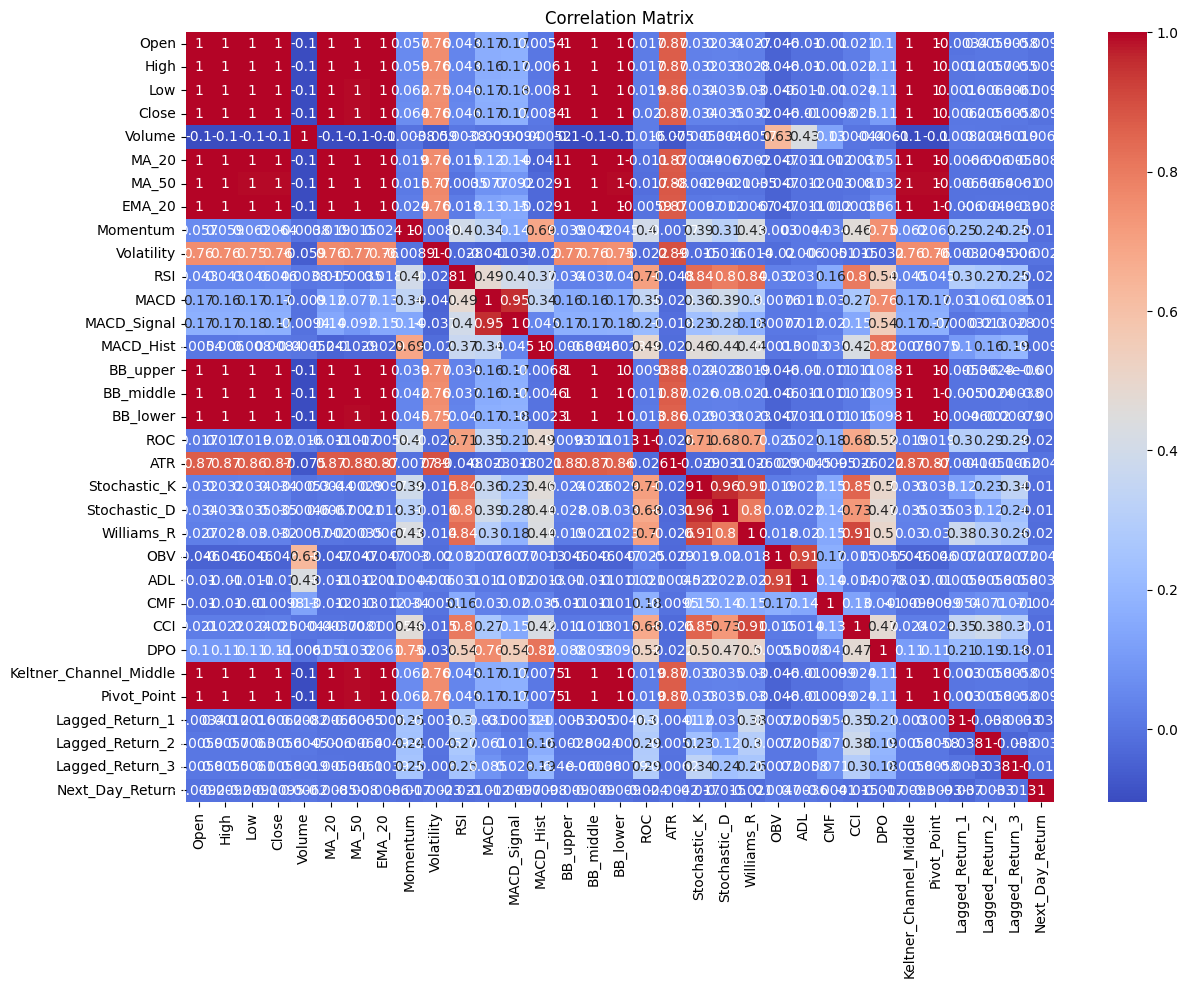

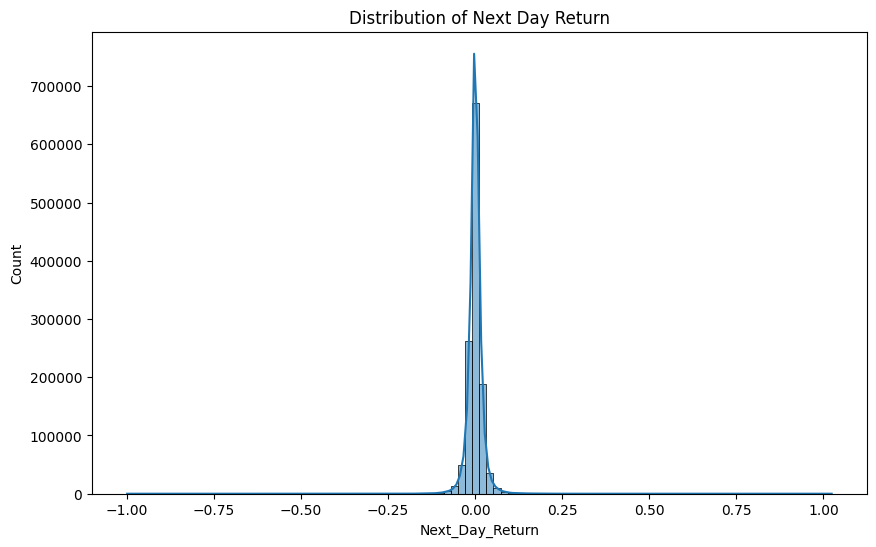

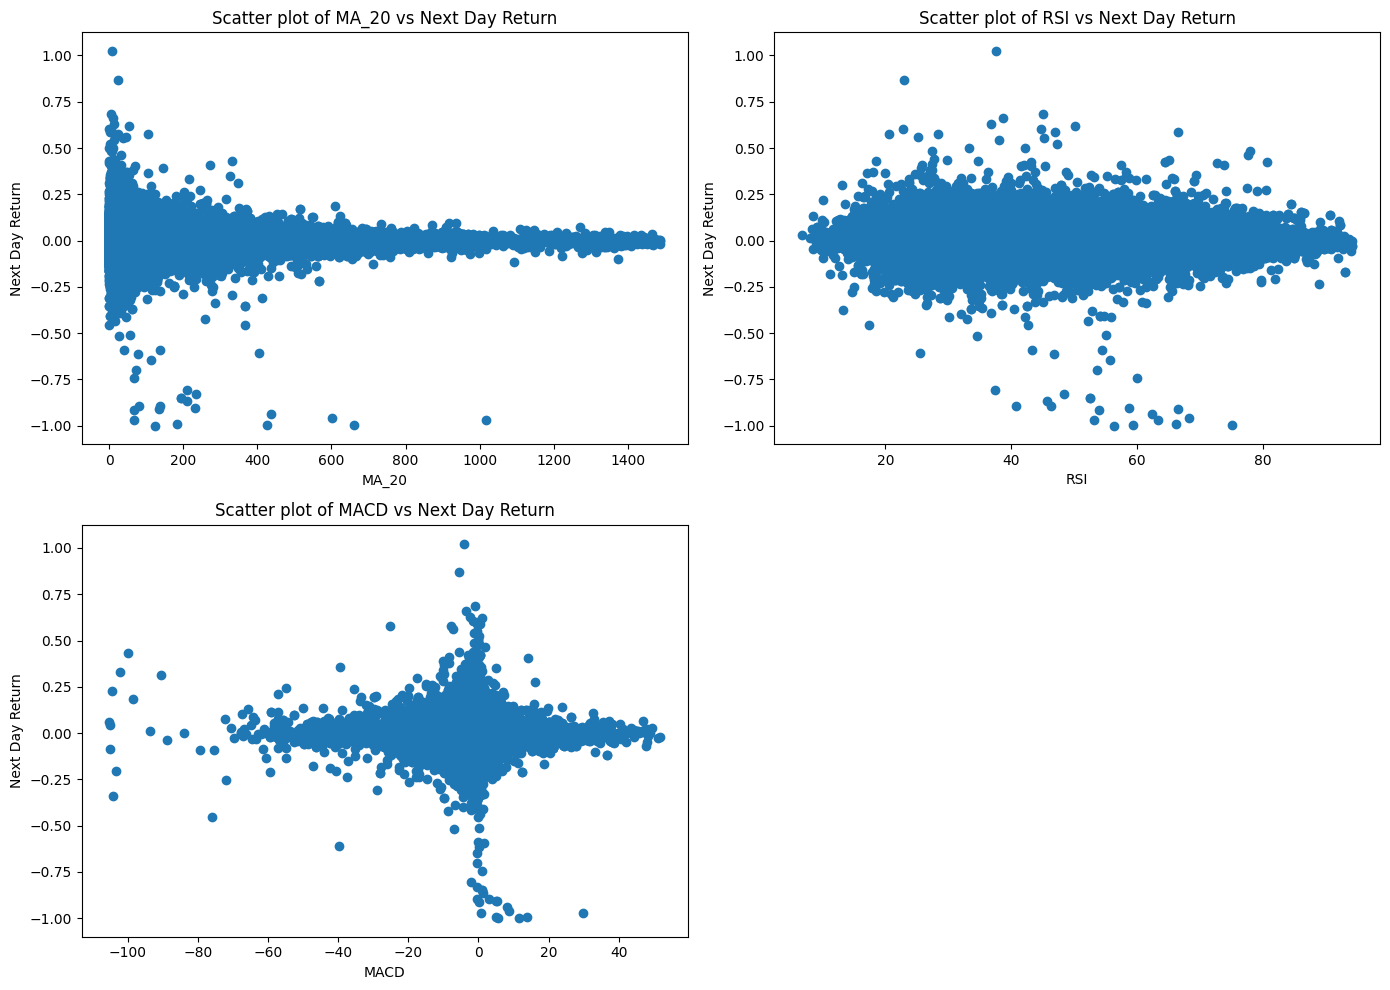

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Correlation matrix
correlation_matrix = combined_data[NUMERIC + TO_PREDICT].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Next_Day_Return'], bins=100, kde=True)
plt.title('Distribution of Next Day Return')
plt.show()

# Scatter plot of a few features against the target
plt.figure(figsize=(14, 10))
for i, feature in enumerate(['MA_20', 'RSI', 'MACD']):
    plt.subplot(2, 2, i+1)
    plt.scatter(combined_data[feature], combined_data['Next_Day_Return'])
    plt.title(f'Scatter plot of {feature} vs Next Day Return')
    plt.xlabel(feature)
    plt.ylabel('Next Day Return')
plt.tight_layout()
plt.show()


**Modeling**

In [14]:
# Install necessary packages
!pip install yfinance pandas_ta xgboost tensorflow

In [15]:
# IMPORTS
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import date

# Define the ticker and the date range
ticker = "AAPL"
start_date = "2010-01-01"
end_date = date.today().strftime("%Y-%m-%d")

# Fetch the data
data = yf.download(ticker, start=start_date, end=end_date)
data.reset_index(inplace=True)  # Ensure 'Date' is a column now

# Use closing prices for prediction
data = data[['Date', 'Close']]
data.set_index('Date', inplace=True)

# Convert time series data to supervised learning problem
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag + 1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df

# Create lagged features
lag = 5  # Example lag value
lagged_data = create_lagged_features(data['Close'], lag)
X = lagged_data.iloc[:, :-1].values
y = lagged_data.iloc[:, -1].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[*********************100%%**********************]  1 of 1 completed


In [16]:
# DecisionTree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'DecisionTree MSE: {mse_dt}')

DecisionTree MSE: 5.49851460981427


In [17]:
# RandomForest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'RandomForest MSE: {mse_rf}')

RandomForest MSE: 3.0245204131449017


In [18]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')

Linear Regression MSE: 2.2742760667820296


In [19]:
# Custom Decision Rules
def custom_decision_rules(predictions, threshold=1.0):
    # Only consider significant increases in predicted price
    buy_signals = predictions > threshold
    return buy_signals

# Apply custom decision rules
buy_signals_dt = custom_decision_rules(y_pred_dt - y_test)
buy_signals_rf = custom_decision_rules(y_pred_rf - y_test)
buy_signals_lr = custom_decision_rules(y_pred_lr - y_test)

print(f'Buy signals (DecisionTree): {buy_signals_dt.sum()}')
print(f'Buy signals (RandomForest): {buy_signals_rf.sum()}')
print(f'Buy signals (Linear Regression): {buy_signals_lr.sum()}')

Buy signals (DecisionTree): 108
Buy signals (RandomForest): 81
Buy signals (Linear Regression): 71


In [20]:
# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
print(f'Best RandomForest MSE: {mse_best_rf}')

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost MSE: {mse_xgb}')

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Fit the model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2, shuffle=False)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}')

Best RandomForest MSE: 2.9521688449599393
XGBoost MSE: 4.135617183428498
Epoch 1/50
92/92 - 3s - loss: 7303.9341 - val_loss: 6367.6641 - 3s/epoch - 35ms/step
Epoch 2/50
92/92 - 0s - loss: 6241.9434 - val_loss: 5435.8345 - 445ms/epoch - 5ms/step
Epoch 3/50
92/92 - 0s - loss: 5520.9810 - val_loss: 4948.5767 - 412ms/epoch - 4ms/step
Epoch 4/50
92/92 - 0s - loss: 5087.0747 - val_loss: 4597.6978 - 428ms/epoch - 5ms/step
Epoch 5/50
92/92 - 0s - loss: 4736.5391 - val_loss: 4291.6089 - 412ms/epoch - 4ms/step
Epoch 6/50
92/92 - 0s - loss: 4424.5498 - val_loss: 4014.8635 - 415ms/epoch - 5ms/step
Epoch 7/50
92/92 - 0s - loss: 4140.4780 - val_loss: 3761.2678 - 431ms/epoch - 5ms/step
Epoch 8/50
92/92 - 0s - loss: 3879.2986 - val_loss: 3526.8901 - 403ms/epoch - 4ms/step
Epoch 9/50
92/92 - 0s - loss: 3637.1812 - val_loss: 3308.5203 - 452ms/epoch - 5ms/step
Epoch 10/50
92/92 - 0s - loss: 3411.0049 - val_loss: 3103.7651 - 429ms/epoch - 5ms/step
Epoch 11/50
92/92 - 0s - loss: 3198.5273 - val_loss: 2910.

<ipython-input-21-a94eb298511f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuyHold'] = shares * data['Close']


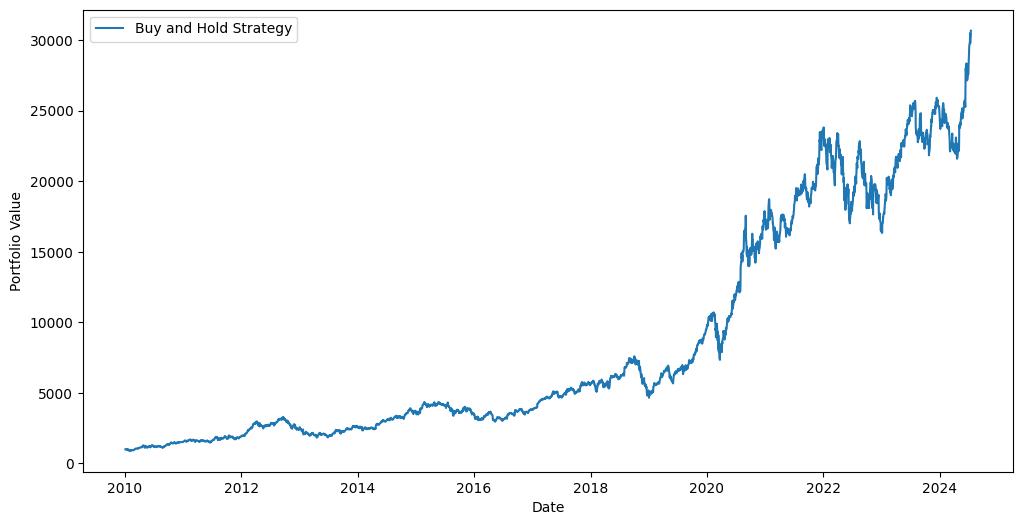

Buy-and-Hold Strategy Return: 2966.77%


In [21]:
# Buy-and-Hold Strategy
initial_capital = 1000  # Starting with $1000
shares = initial_capital / data['Close'][0]  # Buy as many shares as possible at the start

data['BuyHold'] = shares * data['Close']

# Plot the Buy-and-Hold Strategy
plt.figure(figsize=(12,6))
plt.plot(data.index, data['BuyHold'], label='Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

buy_hold_return = data['BuyHold'][-1] / initial_capital - 1
print(f'Buy-and-Hold Strategy Return: {buy_hold_return:.2%}')

<ipython-input-22-cccfd30bafbb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
<ipython-input-22-cccfd30bafbb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
<ipython-input-22-cccfd30bafbb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


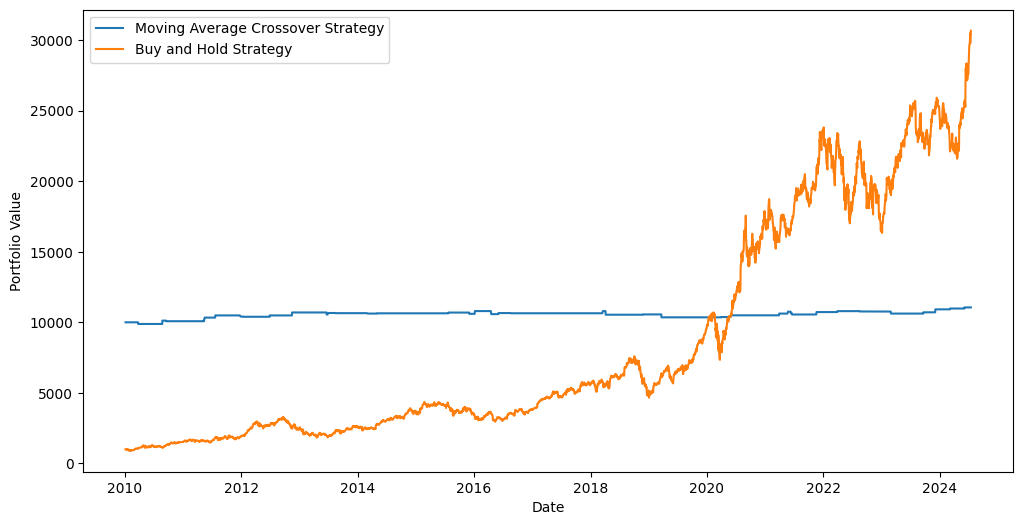

Moving Average Crossover Strategy Return: 10.55%


In [22]:
# Moving Average Crossover Strategy
short_window = 40
long_window = 100

# Create short and long simple moving averages
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate signals
data['Signal'] = 0.0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)

# Generate trading orders
data['Position'] = data['Signal'].diff()

# Initial capital and positions
initial_capital = 10000
positions = initial_capital / data['Close']
data['Strategy'] = data['Position'] * positions.shift() * data['Close'].diff()

# Cumulative strategy returns
data['Strategy_Cum'] = initial_capital + data['Strategy'].cumsum()

# Plot the Strategy
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Strategy_Cum'], label='Moving Average Crossover Strategy')
plt.plot(data.index, data['BuyHold'], label='Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

strategy_return = data['Strategy_Cum'][-1] / initial_capital - 1
print(f'Moving Average Crossover Strategy Return: {strategy_return:.2%}')


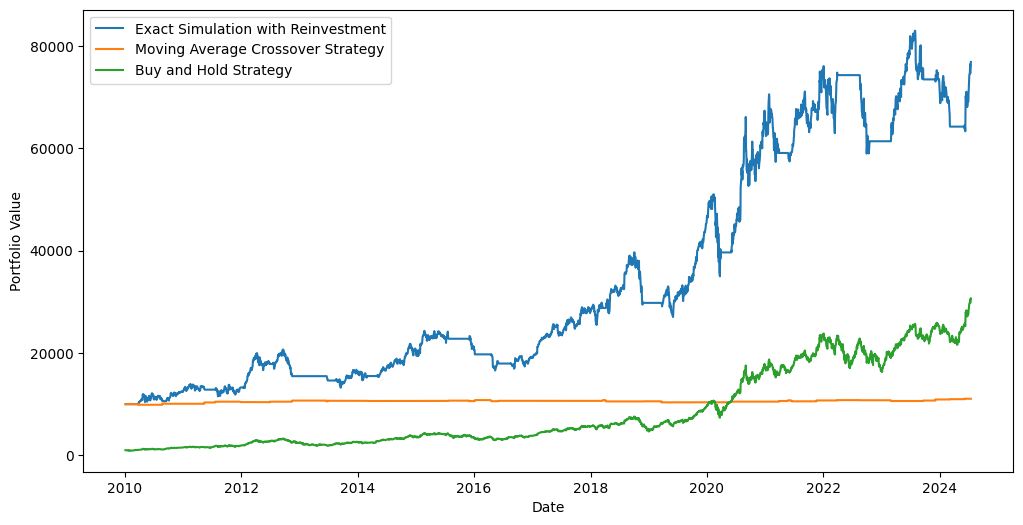

Exact Simulation Return: 669.02%


In [23]:
# Exact Simulation with Reinvestment
capital = initial_capital
positions = 0

for i in range(1, len(data)):
    if data['Position'][i] == 1:  # Buy signal
        positions = capital / data['Close'][i]
        capital = 0
    elif data['Position'][i] == -1:  # Sell signal
        capital = positions * data['Close'][i]
        positions = 0
    data.at[data.index[i], 'Exact_Sim'] = capital + positions * data['Close'][i]

# Plot the Exact Simulation
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Exact_Sim'], label='Exact Simulation with Reinvestment')
plt.plot(data.index, data['Strategy_Cum'], label='Moving Average Crossover Strategy')
plt.plot(data.index, data['BuyHold'], label='Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

exact_sim_return = data['Exact_Sim'][-1] / initial_capital - 1
print(f'Exact Simulation Return: {exact_sim_return:.2%}')


In [24]:
def calculate_cagr(data):
    n = len(data) / 252  # Assuming 252 trading days per year
    return (data[-1] / data[0]) ** (1/n) - 1

def calculate_sharpe_ratio(data, risk_free_rate=0.01):
    returns = data.pct_change().dropna()
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / excess_returns.std()

def calculate_max_drawdown(data):
    roll_max = data.cummax()
    drawdown = data / roll_max - 1.0
    return drawdown.min()

buy_hold_cagr = calculate_cagr(data['BuyHold'])
strategy_cagr = calculate_cagr(data['Strategy_Cum'])
exact_sim_cagr = calculate_cagr(data['Exact_Sim'])

buy_hold_sharpe = calculate_sharpe_ratio(data['BuyHold'])
strategy_sharpe = calculate_sharpe_ratio(data['Strategy_Cum'])
exact_sim_sharpe = calculate_sharpe_ratio(data['Exact_Sim'])

buy_hold_max_drawdown = calculate_max_drawdown(data['BuyHold'])
strategy_max_drawdown = calculate_max_drawdown(data['Strategy_Cum'])
exact_sim_max_drawdown = calculate_max_drawdown(data['Exact_Sim'])

print(f'Buy and Hold CAGR: {buy_hold_cagr:.2%}, Sharpe Ratio: {buy_hold_sharpe:.2f}, Max Drawdown: {buy_hold_max_drawdown:.2%}')
print(f'Moving Average Crossover CAGR: {strategy_cagr:.2%}, Sharpe Ratio: {strategy_sharpe:.2f}, Max Drawdown: {strategy_max_drawdown:.2%}')
print(f'Exact Simulation CAGR: {exact_sim_cagr:.2%}, Sharpe Ratio: {exact_sim_sharpe:.2f}, Max Drawdown: {exact_sim_max_drawdown:.2%}')


Buy and Hold CAGR: 26.61%, Sharpe Ratio: 0.95, Max Drawdown: -44.38%
Moving Average Crossover CAGR: nan%, Sharpe Ratio: -0.14, Max Drawdown: -4.11%
Exact Simulation CAGR: nan%, Sharpe Ratio: 0.68, Max Drawdown: -36.07%


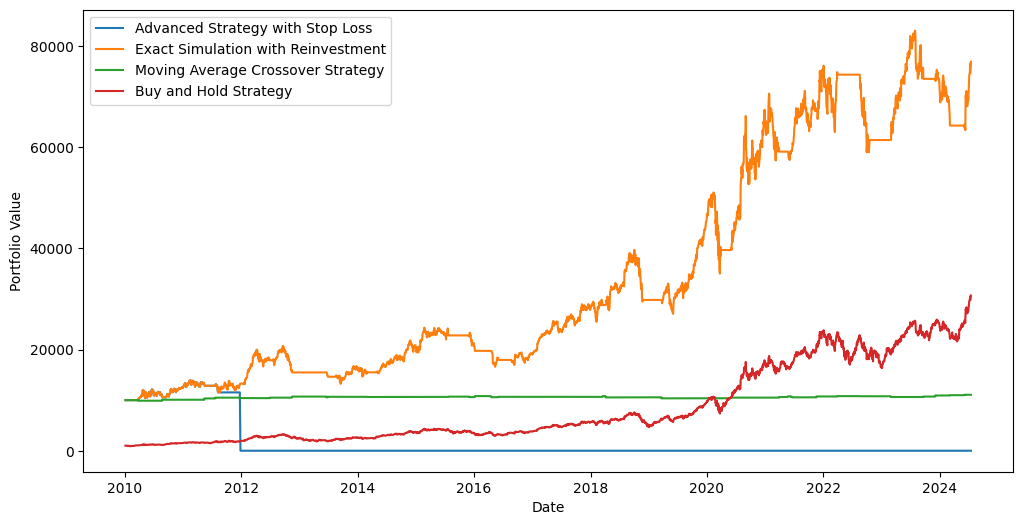

Advanced Strategy Return: -100.00%


In [25]:
# Adding stop-loss to the moving average crossover strategy
stop_loss = 0.05  # 5% stop loss

capital = initial_capital
positions = 0

for i in range(1, len(data)):
    if data['Position'][i] == 1:  # Buy signal
        positions = capital / data['Close'][i]
        capital = 0
    elif data['Position'][i] == -1:  # Sell signal
        capital = positions * data['Close'][i]
        positions = 0
    elif positions > 0 and data['Close'][i] < (1 - stop_loss) * data['Close'][i - 1]:  # Stop loss
        capital = positions * data['Close'][i]
        positions = 0
    data.at[data.index[i], 'Advanced_Strategy'] = capital + positions * data['Close'][i]

# Plot the Advanced Strategy
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Advanced_Strategy'], label='Advanced Strategy with Stop Loss')
plt.plot(data.index, data['Exact_Sim'], label='Exact Simulation with Reinvestment')
plt.plot(data.index, data['Strategy_Cum'], label='Moving Average Crossover Strategy')
plt.plot(data.index, data['BuyHold'], label='Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

advanced_strategy_return = data['Advanced_Strategy'][-1] / initial_capital - 1
print(f'Advanced Strategy Return: {advanced_strategy_return:.2%}')


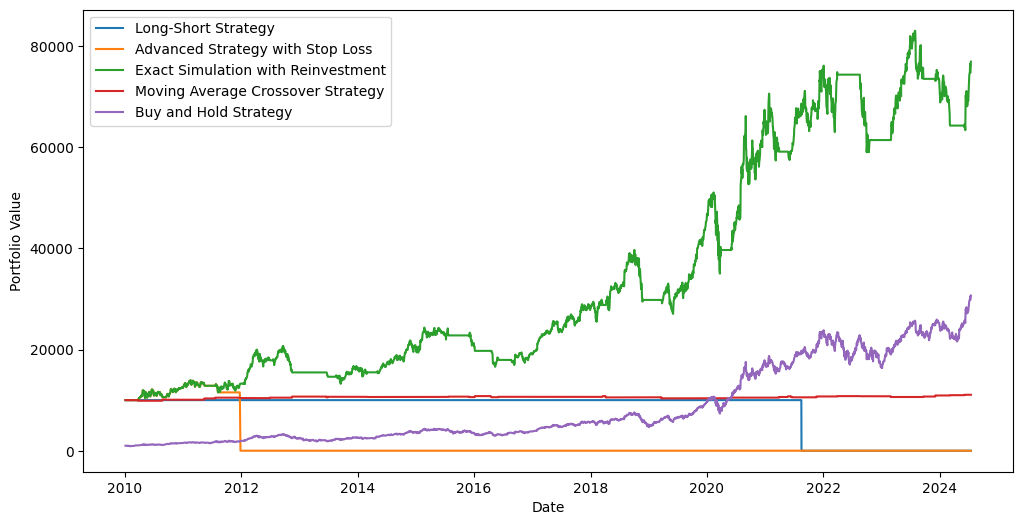

Long-Short Strategy Return: -100.00%


In [27]:
# Long-Short Strategy
# Align predictions with the test set
data['Prediction'] = np.nan  # Initialize with NaN

# Fill in the predictions for the test set period
test_indices = X_test.shape[0]
data.iloc[-test_indices:, data.columns.get_loc('Prediction')] = y_pred_rf

capital = initial_capital
positions = 0

for i in range(1, len(data)):
    if not np.isnan(data['Prediction'][i]):
        if data['Prediction'][i] > data['Close'][i]:  # Long signal
            positions = capital / data['Close'][i]
            capital = 0
        elif data['Prediction'][i] < data['Close'][i]:  # Short signal
            capital = positions * data['Close'][i]
            positions = 0
    data.at[data.index[i], 'LongShort_Strategy'] = capital + positions * data['Close'][i]

# Plot the Long-Short Strategy
plt.figure(figsize=(12,6))
plt.plot(data.index, data['LongShort_Strategy'], label='Long-Short Strategy')
plt.plot(data.index, data['Advanced_Strategy'], label='Advanced Strategy with Stop Loss')
plt.plot(data.index, data['Exact_Sim'], label='Exact Simulation with Reinvestment')
plt.plot(data.index, data['Strategy_Cum'], label='Moving Average Crossover Strategy')
plt.plot(data.index, data['BuyHold'], label='Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

long_short_strategy_return = data['LongShort_Strategy'][-1] / initial_capital - 1
print(f'Long-Short Strategy Return: {long_short_strategy_return:.2%}')


In [28]:
# Fetch S&P500 index data
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
sp500['Close'].fillna(method='ffill', inplace=True)
sp500['Returns'] = sp500['Close'].pct_change()

# Calculate metrics for the benchmark
sp500_cagr = calculate_cagr(sp500['Close'])
sp500_sharpe = calculate_sharpe_ratio(sp500['Close'])
sp500_max_drawdown = calculate_max_drawdown(sp500['Close'])

# Calculate metrics for our best strategy
advanced_strategy_cagr = calculate_cagr(data['Advanced_Strategy'].dropna())
advanced_strategy_sharpe = calculate_sharpe_ratio(data['Advanced_Strategy'].dropna())
advanced_strategy_max_drawdown = calculate_max_drawdown(data['Advanced_Strategy'].dropna())

print(f'S&P500 CAGR: {sp500_cagr:.2%}, Sharpe Ratio: {sp500_sharpe:.2f}, Max Drawdown: {sp500_max_drawdown:.2%}')
print(f'Advanced Strategy CAGR: {advanced_strategy_cagr:.2%}, Sharpe Ratio: {advanced_strategy_sharpe:.2f}, Max Drawdown: {advanced_strategy_max_drawdown:.2%}')


[*********************100%%**********************]  1 of 1 completed

S&P500 CAGR: 11.69%, Sharpe Ratio: 0.67, Max Drawdown: -33.92%
Advanced Strategy CAGR: -100.00%, Sharpe Ratio: -0.58, Max Drawdown: -100.00%


In [29]:
# Exported script: stock_market_analytics.py

import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from datetime import date

# Function to fetch data
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.reset_index(inplace=True)
    return data[['Date', 'Close']]

# Function to create lagged features
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag + 1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    return df

# Function to split data into train and test sets
def split_data(data, lag=5):
    lagged_data = create_lagged_features(data['Close'], lag)
    X = lagged_data.iloc[:, :-1].values
    y = lagged_data.iloc[:, -1].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and predict using different models
def train_and_predict(X_train, y_train, X_test):
    models = {
        'DecisionTree': DecisionTreeRegressor(),
        'RandomForest': RandomForestRegressor(n_estimators=100),
        'LinearRegression': LinearRegression(),
        'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
    }

    predictions = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)

    return predictions

# Function to evaluate models
def evaluate_models(y_test, predictions):
    mse_scores = {}
    for name, y_pred in predictions.items():
        mse_scores[name] = mean_squared_error(y_test, y_pred)
        print(f'{name} MSE: {mse_scores[name]}')
    return mse_scores

# Function to plot strategies
def plot_strategies(data, strategies):
    plt.figure(figsize=(12,6))
    for name, strategy in strategies.items():
        plt.plot(data.index, strategy, label=name)
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()

# Main function
def main():
    ticker = 'AAPL'
    start_date = '2010-01-01'
    end_date = date.today().strftime("%Y-%m-%d")

    data = fetch_data(ticker, start_date, end_date)
    data.set_index('Date', inplace=True)

    X_train, X_test, y_train, y_test = split_data(data)
    predictions = train_and_predict(X_train, y_train, X_test)
    evaluate_models(y_test, predictions)

    # Additional code for strategies and plotting goes here

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed


DecisionTree MSE: 4.756148009766002
RandomForest MSE: 2.923090280243837
LinearRegression MSE: 2.2742760667820296
XGBoost MSE: 4.135617183428498
